In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("./eda-proj-fc-purchase.csv")
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


In [4]:
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'],
      dtype='object')

In [5]:
for i in df.columns:
    print(i)
    print(len(df[i].unique()))

거래id
159328
유형
2
고객id
79615
코스ID
407
사이트
1
포맷
2
카테고리
11
코스(상품) 이름
407
거래일자
121645
쿠폰이름
1227
판매가격
625
결제수단
6
실거래금액
3366
쿠폰할인액
1201
거래금액
1606
환불금액
1763


In [6]:
df['환불금액'] = pd.to_numeric(df['환불금액'], errors='coerce').fillna(0).astype(int)
df['환불금액']

0              0
1              0
2              0
3              0
4              0
           ...  
159323         0
159324         0
159325         0
159326         0
159327   -345240
Name: 환불금액, Length: 159328, dtype: int64

In [7]:
df['판매가격'] = pd.to_numeric(df['판매가격'], errors='coerce').fillna(0).astype(int)
df['판매가격']

0         189000
1         501000
2         549000
3         165000
4         239000
           ...  
159323    217000
159324    385000
159325    166000
159326    289000
159327    370000
Name: 판매가격, Length: 159328, dtype: int64

In [8]:
df['쿠폰할인액'] = pd.to_numeric(df['쿠폰할인액'], errors='coerce').fillna(0).astype(int)
df['쿠폰할인액']

0             0
1             0
2             0
3         30000
4             0
          ...  
159323    10000
159324        0
159325    30000
159326        0
159327        0
Name: 쿠폰할인액, Length: 159328, dtype: int64

In [9]:
# '코스ID'와 '코스명'을 매핑하는 딕셔너리 생성
# id_name_mapping = df[['코스ID', '코스(상품) 이름']].drop_duplicates().set_index('코스ID')['코스(상품) 이름'].to_dict()
id_name_mapping = df[['코스ID', '코스(상품) 이름']].drop_duplicates().set_index('코스ID')['코스(상품) 이름'].to_dict()
id_name_mapping


{209016: '올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원',
 210664: '초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무',
 211782: '편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트 마스터',
 213450: '초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jetpack Compose',
 210773: '초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접',
 207628: '초격차 패키지 : 퍼포먼스 마케팅, 데이터로 완전 정복',
 214558: '[Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지',
 214298: '올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터',
 213315: '네오아카데미 : 킨티의 58개의 예제를 통해 배우는 캐주얼 캐릭터 완전판',
 203328: '올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵',
 204652: 'The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 MSA 구축 by 이희창',
 214383: '(221212~230131) 올인원 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 Essential',
 211492: '초격차 패키지 : 프론트엔드 웹 개발의 모든 것 (시그니처)',
 213924: '초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps',
 208250: '쟈니브로스에게 배우는 영상 완성의 3단계 : 편집, 색보정, CG효과',
 203530: '초격차 패키지 : 한 번에 끝내는 반복 업무 자동화',
 213604: '초격차 패키지 : React Native를 활용한 빠르고 완성도 높은 앱 개발 \u2028with 21개 프로젝트',
 205548: '초격차 패키지 : 한 번에 끝내는 데이터 분석',
 212555: '올인원 패키지 : 컴퓨터 비전 정주행 Kit',
 21

In [10]:
# df_income = df.groupby(by='코스ID')['실거래금액'].sum().rename({'코스ID', '실거래금액'})
df_income = df.groupby(by='코스ID')['실거래금액'].sum().reset_index()
df_income
#df_income.columns = ['--', '--']


df_income_sort = df_income.sort_values(by='실거래금액', ascending=False)
df_income_sort.head(10)

,코스ID,실거래금액
82,203720,393085039
354,212600,358021518
195,207343,356228283
239,208963,354194510
71,203525,344187317
310,211368,315884158
107,204373,305181454
283,210664,277370785
194,207161,274095002
70,203523,260299655


In [11]:

df_refund = df.groupby(by='코스ID')['환불금액'].sum().reset_index()
df_refund

,코스ID,환불금액
0,2204,0
1,2600,0
2,200260,-1471576
3,200399,-1860000
4,201408,0
...,...,...
402,214496,-777000
403,214558,0
404,214561,0
405,214833,-1602500


In [12]:
df_income_sort['코스명'] = df_income_sort['코스ID'].map(id_name_mapping)
df_income_sort = df_income_sort.merge(df_refund, on='코스ID', how='left')
df_income_sort

,코스ID,실거래금액,코스명,환불금액
0,203720,393085039,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,-40470561
1,212600,358021518,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,-50882982
2,207343,356228283,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,-43261117
3,208963,354194510,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,-38585250
4,203525,344187317,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,-45481183
...,...,...,...,...
402,202883,0,올인원 패키지 : 디지털 마케팅 MAX 2020,0
403,213848,0,test_qa,0
404,2600,0,올인원 패키지 : 앱/웹 서비스 기획,0
405,209667,0,The RED : AI 대학원 서민준에게 배우는 자연어처리 : 대형언어모델&퓨샷러닝,-18920000


In [13]:
df_income_sort['순매출'] = df_income_sort['실거래금액'] + df_income_sort['환불금액']
df_income_sort2 = df_income_sort.sort_values(by='순매출', ascending=False)
df_income_sort2.head(10)

,코스ID,실거래금액,코스명,환불금액,순매출
0,203720,393085039,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,-40470561,352614478
3,208963,354194510,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,-38585250,315609260
2,207343,356228283,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,-43261117,312967166
1,212600,358021518,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,-50882982,307138536
4,203525,344187317,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,-45481183,298706134
6,204373,305181454,초격차 패키지 : 일잘러 필수 스킬 모음.zip,-25184651,279996803
5,211368,315884158,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),-46931042,268953116
7,210664,277370785,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,-21345965,256024820
8,207161,274095002,편집하는여자의 영상편집 마스터클래스 - 제 3강 디테일한 이펙트로 완성하는 프리미어,-18819898,255275104
9,203523,260299655,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,-27274895,233024760


In [14]:
df_income_sort2['환불비중'] = abs(df_income_sort2['환불금액']) / df_income_sort2['실거래금액'] * 100
df_income_sort2

,코스ID,실거래금액,코스명,환불금액,순매출,환불비중
0,203720,393085039,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,-40470561,352614478,10.295625
3,208963,354194510,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,-38585250,315609260,10.893802
2,207343,356228283,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,-43261117,312967166,12.144212
1,212600,358021518,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,-50882982,307138536,14.212269
4,203525,344187317,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,-45481183,298706134,13.214079
...,...,...,...,...,...,...
402,202883,0,올인원 패키지 : 디지털 마케팅 MAX 2020,0,0,NaN
403,213848,0,test_qa,0,0,NaN
404,2600,0,올인원 패키지 : 앱/웹 서비스 기획,0,0,NaN
406,2204,0,올인원 패키지 : 디자인 툴,0,0,NaN


In [15]:
df_income_sort3 = df_income_sort2.sort_values(by='환불비중', ascending=False)
df_income_sort3.head(10)

,코스ID,실거래금액,코스명,환불금액,순매출,환불비중
405,209667,0,The RED : AI 대학원 서민준에게 배우는 자연어처리 : 대형언어모델&퓨샷러닝,-18920000,-18920000,inf
243,206848,22939033,The RED : Youtube 알고리즘 개발자 이준석의 추천시스템 마스터 클래스,-9153167,13785866,39.902148
381,206067,3312500,초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,-1248500,2064000,37.690566
368,207060,5356000,The RED : FX 슈퍼바이저 김장형의 후디니 디스트럭션 : RBD Simula...,-1506000,3850000,28.117999
362,202659,6152400,글로벌 엑스퍼트: 캐글 1위와 풀어보는 머신러닝 입문 트레이닝,-1655800,4496600,26.913075
395,209132,537000,AI/Data Science Conference : AI Explorer 22,-139000,398000,25.884544
349,201998,9003005,올인원 패키지 : iOS 앱 개발,-2186995,6816010,24.291834
21,209597,203786357,초격차 패키지 : 데이터 엔지니어링,-49020883,154765474,24.055037
299,207890,16534000,The RED : 국내 최대 규모의 올인원 프로덕션 : 쟈니브로스에게 배우는 뮤직비...,-3871000,12663000,23.412362
134,213723,51353834,초격차 패키지 : Solidity로 시작하는 이더리움(EVM) 기반 블록체인 개발 ...,-11203066,40150768,21.815442


In [16]:
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,0,159000,0
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,0,501000,0
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,0,549000,0
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,0,239000,0


In [17]:

df['거래일자'] = pd.to_datetime(df['거래일자'].str.replace("오후", "PM").str.replace("오전", "AM"), format="%Y. %m. %d. %p %I:%M:%S")

# 연, 월, 일, 시 추출 및 새로운 열에 저장
df['연'] = df['거래일자'].dt.year
df['월'] = df['거래일자'].dt.month
df['일'] = df['거래일자'].dt.day
df['시'] = df['거래일자'].dt.hour


In [18]:
df = df.rename(columns={'코스(상품) 이름': '코스명'})
df.columns
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스명,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,0,549000,0,2022,12,31,23
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,0,239000,0,2022,12,31,23


In [19]:
sorted_m = df.groupby(by='월')['판매가격'].sum().reset_index()
sorted_h = df.groupby(by='시')['판매가격'].sum().reset_index()
sorted_h
sorted_m

,월,판매가격
0,1,3867934750
1,2,3164075560
2,3,2456579240
3,4,2219227960
4,5,2124258328
5,6,2626842470
6,7,3125234818
7,8,3033063755
8,9,2938073258
9,10,3001562318


/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython

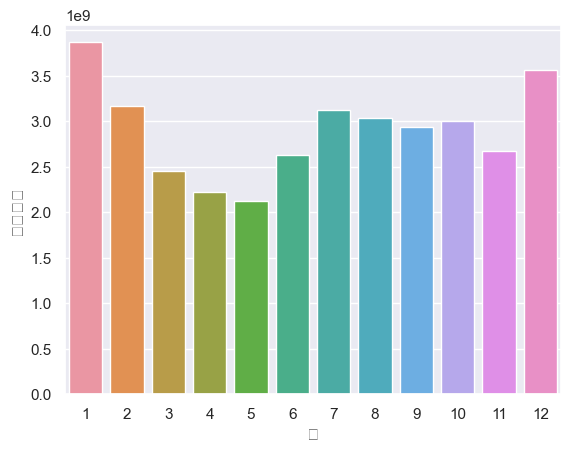

In [43]:
sns.barplot(data=sorted_m, x='월', y='판매가격')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/c

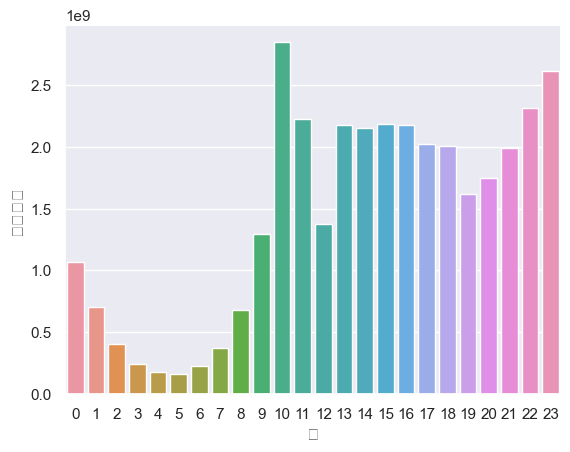

In [46]:
sns.barplot(data=sorted_h, x='시', y='판매가격')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   거래id    159328 non-null  int64         
 1   유형      159328 non-null  object        
 2   고객id    159328 non-null  int64         
 3   코스ID    159328 non-null  int64         
 4   사이트     159328 non-null  object        
 5   포맷      159328 non-null  object        
 6   카테고리    159328 non-null  object        
 7   코스명     159328 non-null  object        
 8   거래일자    159328 non-null  datetime64[ns]
 9   쿠폰이름    159328 non-null  object        
 10  판매가격    159328 non-null  int64         
 11  결제수단    159328 non-null  object        
 12  실거래금액   159328 non-null  int64         
 13  쿠폰할인액   159328 non-null  int64         
 14  거래금액    159328 non-null  object        
 15  환불금액    159328 non-null  int64         
 16  연       159328 non-null  int32         
 17  월       159328 non-null  int3

In [23]:
df2 = df[['카테고리', '코스ID', '코스명', '판매가격', '실거래금액', '쿠폰할인액', '환불금액']]
df2['매출'] = df['실거래금액'] - df['환불금액']
len(df2)

/var/folders/vf/j0dck67d0j1dpgnk9c8mynz00000gn/T/ipykernel_29198/4041711197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['매출'] = df['실거래금액'] - df['환불금액']


159328

In [24]:
df2[df2.환불금액 < 0].head(20)

,카테고리,코스ID,코스명,판매가격,실거래금액,쿠폰할인액,환불금액,매출
1112,프로그래밍,213905,초격차 패키지 : 21개 프로젝트로 완성하는 인터랙티브 웹 개발 with Three...,158000,-158000,0,-158000,0
1139,데이터 사이언스,214402,빵형의 수학 없이 뽀개는 인공지능 입문,130000,-65000,0,-65000,0
1148,프로그래밍,203935,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,222000,-128000,0,-128000,0
1150,데이터 사이언스,213244,올인원 패키지 : 30개 사례로 배우는 Anomaly Detection 알고리즘 구...,226000,-221004,0,-221004,0
1154,프로그래밍,211087,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,185000,-185000,0,-185000,0
1158,프로그래밍,211368,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),201000,-171000,0,-171000,0
1164,업무 생산성,208104,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,184000,-184000,0,-184000,0
1169,프로그래밍,205949,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,200000,-200000,0,-200000,0
1174,마케팅,210396,초격차 패키지 : 한 번에 끝내는 디지털 마케팅 시그니처 플러스,311000,-207333,0,-207333,0
1177,프로그래밍,203525,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,242000,-212000,0,-212000,0


In [25]:
df2.groupby(by='카테고리')['코스명'].value_counts()

카테고리      코스명                                                     
데이터 사이언스  올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화                         1941
          초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능                                 1539
          초격차 패키지 : 한 번에 끝내는 데이터 분석                                   1394
          초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z                          1184
          초격차 패키지 : 데이터 엔지니어링                                         1082
                                                                      ... 
프로그래밍     sudo : Tech Leader's Talk 2022 VOD                            41
          올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 보드게임 제작 실습      40
          [Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지                      36
          test_qa                                                        1
          합격 패스 : 정보처리기사 필기&실기                                           1
Name: count, Length: 407, dtype: int64

In [26]:
category_list = df2.카테고리.unique()
category_list

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

In [27]:
df_sorted_date = df.groupby(by=['월', '일'])['실거래금액'].sum().reset_index()


In [28]:
df_sorted_date['new_date'] = df_sorted_date['월'].astype(str) + "." + df_sorted_date['일'].astype(str)
df_sorted_date['new_date'] = df_sorted_date['new_date'].astype(float)

In [29]:
df_sorted_date['income'] = df_sorted_date['실거래금액'] / 1000000
df_sorted_date['income'] = df_sorted_date['income'].astype(int)
df_sorted_date

,월,일,실거래금액,new_date,income
0,1,1,35128750,1.10,35
1,1,2,42187200,1.20,42
2,1,3,100619704,1.30,100
3,1,4,101441124,1.40,101
4,1,5,165650816,1.50,165
...,...,...,...,...,...
360,12,27,62969186,12.27,62
361,12,28,62923705,12.28,62
362,12,29,129341157,12.29,129
363,12,30,79954108,12.30,79


In [30]:
df_sk = df_sorted_date[['new_date', 'income']]
df_sk

,new_date,income
0,1.10,35
1,1.20,42
2,1.30,100
3,1.40,101
4,1.50,165
...,...,...
360,12.27,62
361,12.28,62
362,12.29,129
363,12.30,79


In [31]:
df_sk_train = df_sk.iloc[0:300]       # 0~299행 (총 300행)
df_sk_val = df_sk.iloc[300:330]       # 300~329행 (총 30행)
df_sk_test = df_sk.iloc[330:365]      # 330~364행 (총 35행)

In [32]:
print(len(df_sk_train))
print(len(df_sk_val))
print(len(df_sk_test))

300
30
35


In [33]:
df_sk_train

,new_date,income
0,1.10,35
1,1.20,42
2,1.30,100
3,1.40,101
4,1.50,165
...,...,...
295,10.23,117
296,10.24,51
297,10.25,61
298,10.26,53


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train = df_sk_train['new_date'].values.reshape(-1, 1)
y_train = df_sk_train['income']

x_val = df_sk_val['new_date'].values.reshape(-1, 1)
y_val = df_sk_val['income']

x_test = df_sk_test['new_date'].values.reshape(-1, 1)
y_test = df_sk_test['income']

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(x_val)
y_pred
# # 정확도 계산
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)


/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([37, 37, 37, 37, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72])

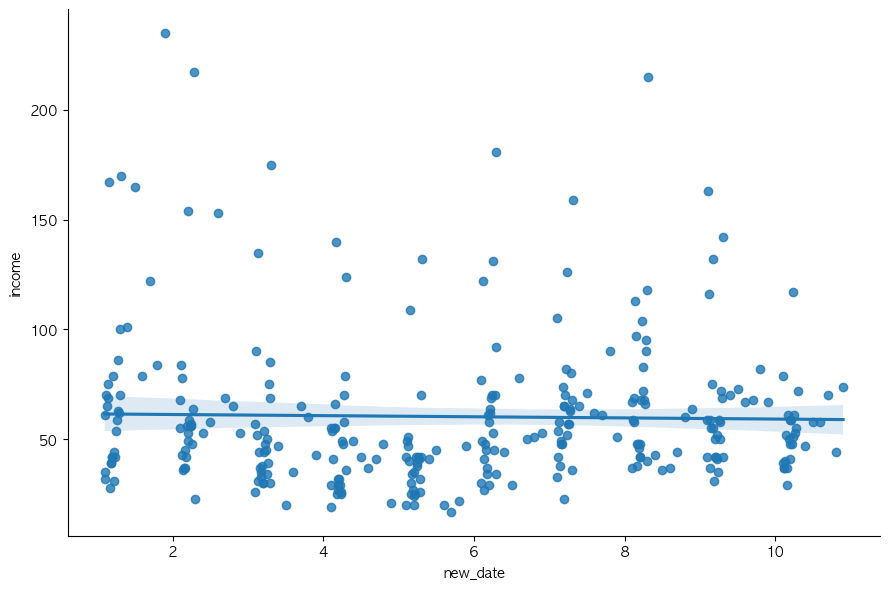

In [35]:
sns.lmplot(data=df_sk_train, x='new_date', y='income', height=6, aspect=1.5)
plt.show()

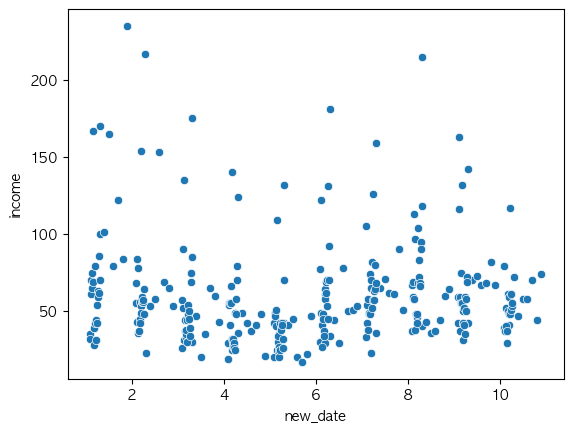

In [36]:
sns.scatterplot(data=df_sk_train, x='new_date', y='income')
plt.show()

In [37]:
df2

,카테고리,코스ID,코스명,판매가격,실거래금액,쿠폰할인액,환불금액,매출
0,업무 생산성,209016,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,189000,159000,0,0,159000
1,부동산/금융,210664,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,501000,501000,0,0,501000
2,영상/3D,211782,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,549000,549000,0,0,549000
3,프로그래밍,213450,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,165000,135000,30000,0,135000
4,프로그래밍,210773,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",239000,239000,0,0,239000
...,...,...,...,...,...,...,...,...
159323,부업/창업,204491,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,217000,207000,10000,0,207000
159324,영상/3D,206811,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,385000,385000,0,0,385000
159325,데이터 사이언스,202927,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,166000,136000,30000,0,136000
159326,업무 생산성,208104,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,289000,289000,0,0,289000


In [38]:
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스명,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,0,549000,0,2022,12,31,23
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,0,239000,0,2022,12,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,0,2022,1,1,0
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,0,385000,0,2022,1,1,0
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,0,2022,1,1,0
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,0,289000,0,2022,1,2,11


In [39]:
unique_category = df.카테고리.unique()
unique_category

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

<Axes: xlabel='월', ylabel='판매가격'>

/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from curren

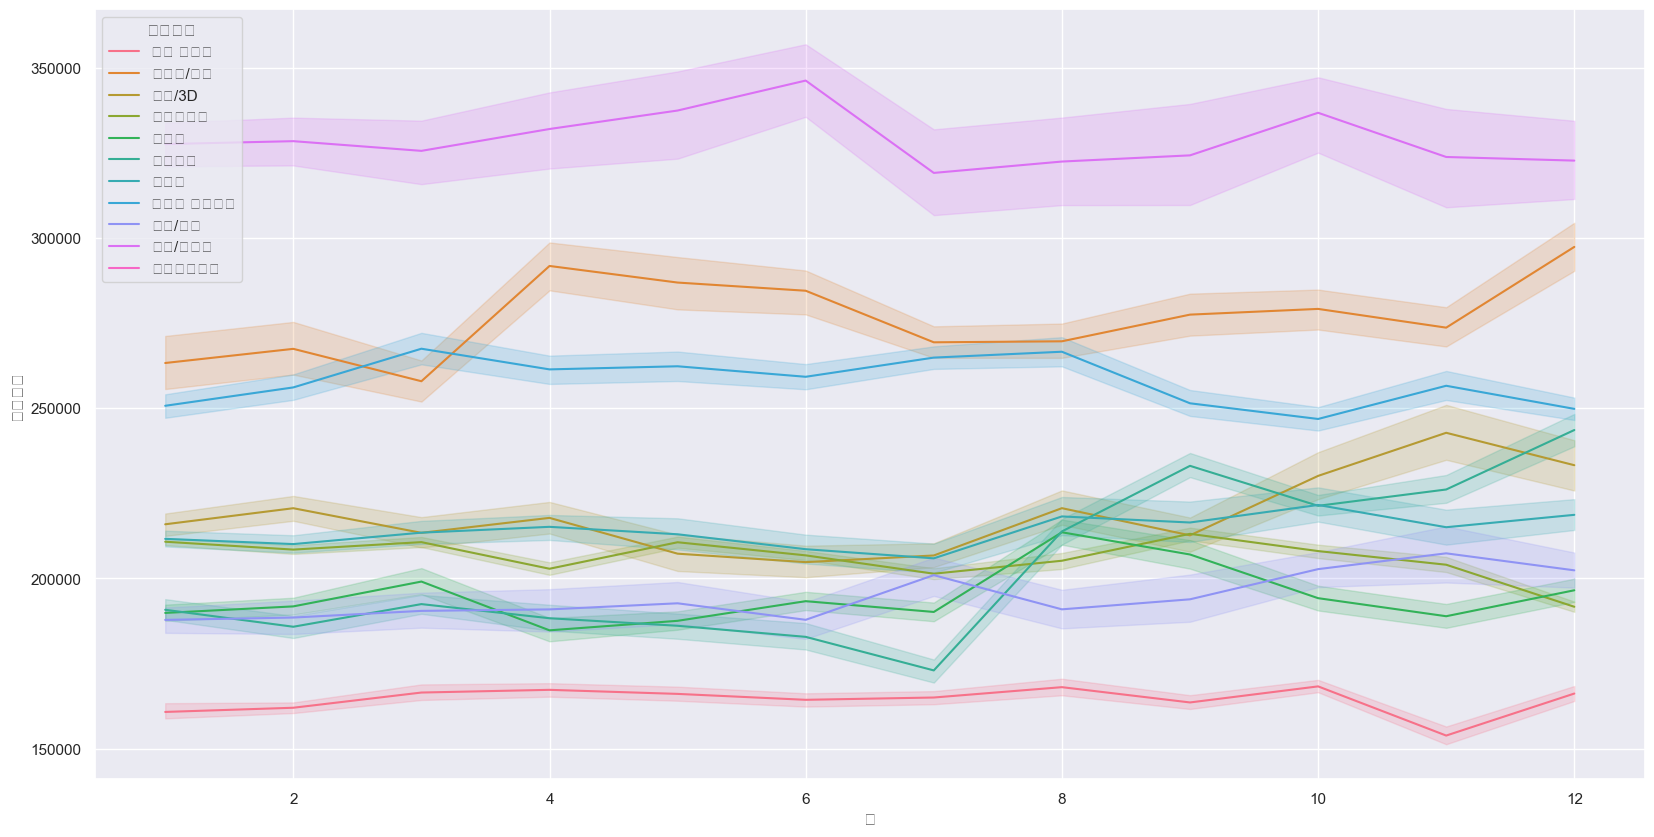

In [40]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="월", y="판매가격", hue="카테고리", data=df, ax=ax)


In [41]:
df_corr = df
df_corr = df_corr.drop('연', axis=1)
df_corr

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스명,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,일,시
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,0,159000,0,12,31,22
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,0,501000,0,12,30,18
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,0,549000,0,12,31,23
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0,12,31,23
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,0,239000,0,12,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,0,1,1,0
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,0,385000,0,1,1,0
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,0,1,1,0
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,0,289000,0,1,2,11


In [42]:
df_corr = df_corr.corr().round(2)
df_corr

ValueError: could not convert string to float: 'PAYMENT'

NameError: name 'df_corr' is not defined

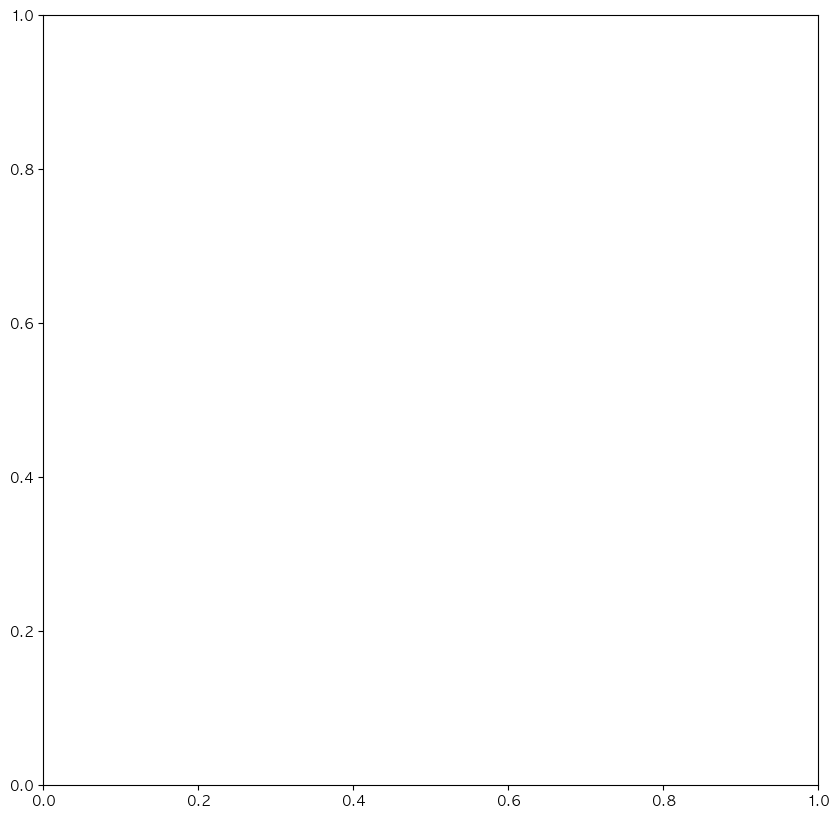

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.show()
